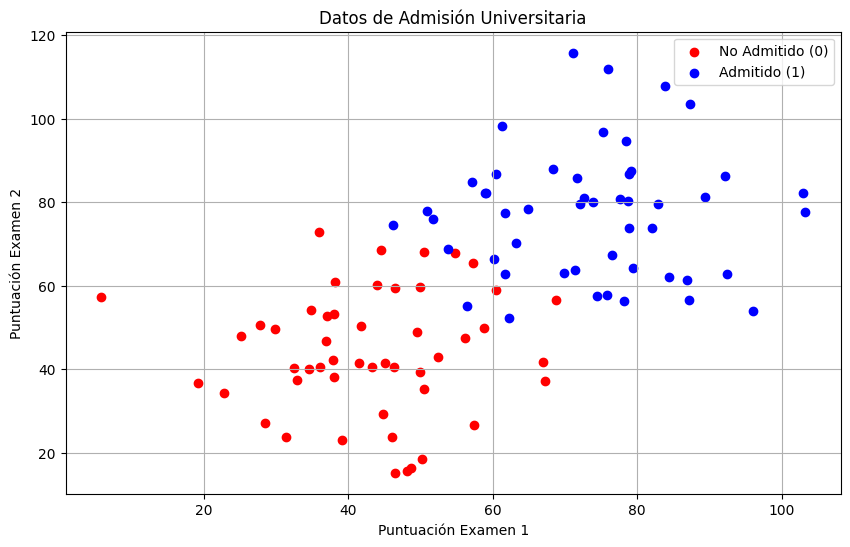

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Para resultados reproducibles
np.random.seed(42)

# Número de estudiantes
num_students = 100

# Generar puntuaciones para estudiantes NO admitidos (Clase 0)
# Media de 45, desviación estándar de 15
scores_not_admitted = np.random.normal(45, 15, (num_students // 2, 2))
labels_not_admitted = np.zeros((num_students // 2, 1))

# Generar puntuaciones para estudiantes ADMITIDOS (Clase 1)
# Media de 75, desviación estándar de 15
scores_admitted = np.random.normal(75, 15, (num_students // 2, 2))
labels_admitted = np.ones((num_students // 2, 1))

# Combinar los datos
X = np.vstack((scores_not_admitted, scores_admitted))
y = np.vstack((labels_not_admitted, labels_admitted))

# Visualizar los datos generados
plt.figure(figsize=(10, 6))
plt.scatter(X[y.flatten() == 0][:, 0], X[y.flatten() == 0][:, 1], color='red', label='No Admitido (0)')
plt.scatter(X[y.flatten() == 1][:, 0], X[y.flatten() == 1][:, 1], color='blue', label='Admitido (1)')
plt.title('Datos de Admisión Universitaria')
plt.xlabel('Puntuación Examen 1')
plt.ylabel('Puntuación Examen 2')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
def sigmoid(z):
    """Calcula la función sigmoide."""
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, w):
    """Calcula la función de coste (Entropía Cruzada)."""
    m = len(y)
    h = sigmoid(X @ w)
    # Añadimos un valor pequeño (epsilon) para evitar log(0)
    epsilon = 1e-9
    cost = -(1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

def train_logistic_regression(X, y, alpha, epochs):
    """Entrena el modelo usando descenso de gradiente."""
    m, n = X.shape

    # 1. Añadir el término de sesgo (columna de unos) a X
    X_b = np.c_[np.ones((m, 1)), X]

    # 2. Inicializar los pesos (w0, w1, w2)
    w = np.zeros((n + 1, 1))

    # Guardar historial de coste para visualizar
    cost_history = []

    # 3. Bucle de descenso de gradiente
    for i in range(epochs):
        # Calcular la hipótesis (predicciones)
        h = sigmoid(X_b @ w)

        # Calcular el gradiente
        gradient = (1/m) * (X_b.T @ (h - y))

        # Actualizar los pesos
        w = w - alpha * gradient

        # Registrar el coste
        cost = cost_function(X_b, y, w)
        cost_history.append(cost)

    return w, cost_history

# Hiperparámetros
alpha = 0.001  # Tasa de aprendizaje
epochs = 100000 # Número de iteraciones

# Entrenar el modelo
weights, costs = train_logistic_regression(X, y, alpha, epochs)

print("Pesos finales aprendidos (w0, w1, w2):")
print(weights)

Pesos finales aprendidos (w0, w1, w2):
[[-5.90003798]
 [ 0.05429959]
 [ 0.0490036 ]]


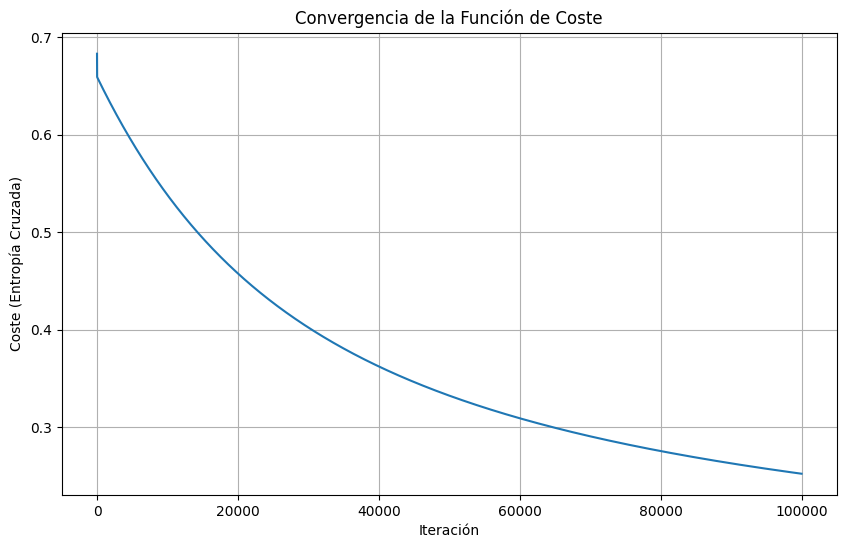

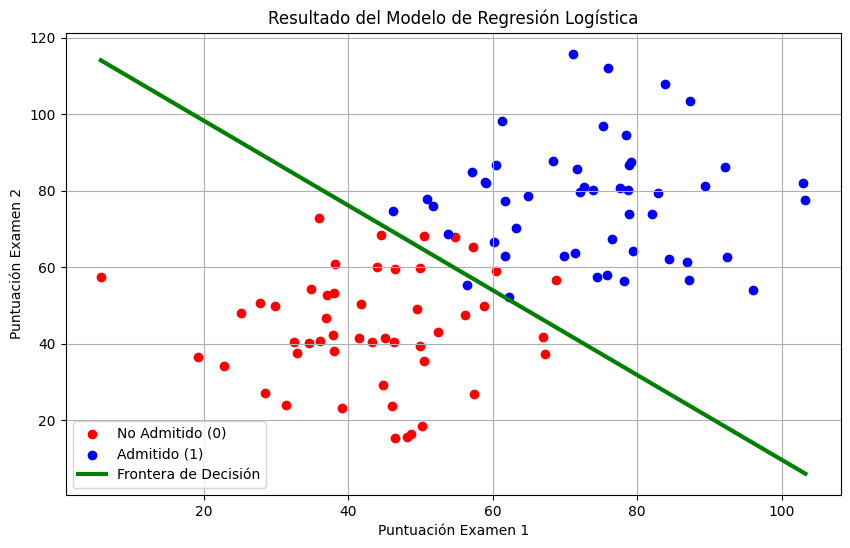

In [3]:
# Visualizar la convergencia del coste
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), costs)
plt.title('Convergencia de la Función de Coste')
plt.xlabel('Iteración')
plt.ylabel('Coste (Entropía Cruzada)')
plt.grid(True)
plt.show()


# Visualizar la frontera de decisión
plt.figure(figsize=(10, 6))
plt.scatter(X[y.flatten() == 0][:, 0], X[y.flatten() == 0][:, 1], color='red', label='No Admitido (0)')
plt.scatter(X[y.flatten() == 1][:, 0], X[y.flatten() == 1][:, 1], color='blue', label='Admitido (1)')

# La frontera de decisión es la línea donde w0 + w1*x1 + w2*x2 = 0
# Despejamos x2 para poder dibujarla: x2 = (-w0 - w1*x1) / w2
x1_values = np.array([np.min(X[:,0]), np.max(X[:,0])])
x2_values = (-weights[0] - weights[1] * x1_values) / weights[2]

plt.plot(x1_values, x2_values, color='green', linewidth=3, label='Frontera de Decisión')

plt.title('Resultado del Modelo de Regresión Logística')
plt.xlabel('Puntuación Examen 1')
plt.ylabel('Puntuación Examen 2')
plt.legend()
plt.grid(True)
plt.show()